In [83]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate

In [84]:
#Define cosine function
f_cosine = lambda x: np.cos(x)
#Set x boundaries
bounds_cosine = [-np.pi/2, np.pi/2]
x_cosine = np.linspace(bounds_cosine[0], bounds_cosine[1], 11)
y_cosine = f_cosine(x_cosine)
#Skipping the first and last regions in the x data    
xx_cosine = np.linspace(x_cosine[1], x_cosine[-2]-1e-13, 101)
yy_true_cosine = f_cosine(xx_cosine)

In [85]:
#Polynomial fitting
def polynomial(x, y, xx, yy_true, bounds, deg, ax1=None, plot=False):
    dx = np.median(np.diff(x))
    #Generating the y data points with the defined function
    yy = np.zeros(len(yy_true))
    x_min = bounds[0]
    x_max = bounds[1]

    def poly(deg, xx):
        #Performing the fit
        for i, mx in enumerate(xx):
            j = np.int((mx - x_min)/dx)
            pp = np.polyfit(x[j-1:j+3], y[j-1: j+3], deg)
            yy[i] = np.polyval(pp, mx)
        return yy
    #Second degree polynomial fitting
    yy_p = poly(2, xx)
    if (plot and ax1 != None):
        ax1.plot(xx, yy_p, '-', markersize = '2', color = 'black')
        ax1.plot(xx, yy_true, '.', markersize = '6', color = 'red')
        ax1.set_title("2nd Order Polynomial Fit", fontsize = 20)
        ax1.set_ylabel("f(x)", fontsize = 18)
        ax1.set_xlabel("x", fontsize = 18)

    def poly_err(deg):
        #Returns the mean error for any order of polynomial fit
        return repr(np.mean(np.abs(poly(deg,xx) - yy_true)))
    
    return poly_err(deg)

In [86]:
#Cubic spline fitting
def spline(x, y, xx, yy_true, ax2=None, plot=False):
    spln = interpolate.splrep(x, y)
    yy_spl = interpolate.splev(xx, spln)

    if (plot and ax2 != None):
        ax2.plot(xx, yy_spl, '-', markersize = '2', color = 'black')
        ax2.plot(xx, yy_true, '.', markersize = '6', color = 'red')
        ax2.set_title("Cubic Spline Fit", fontsize = 20)
        ax2.set_xlabel("x", fontsize = 18)
    
    return yy_spl

In [87]:
#Rational function interpolation

def rational(x, y,yy_true, xx_rat, f, n, m ,ax3=None, plot=False, pinv = True):
    
    def rational_eval(p, q, x):
        top = 0
        for i in range(len(p)):
            top = top + p[i]*x**i
        bot = 1
        for i in range(len(q)):
            bot = bot + q[i]*x**(i+1)

        return top/bot

    def rational_fit(x, y, n, m):
        assert(len(x) == n+m-1)
        assert(len(y) == len(x))
        s = n+m-1
        mat = np.zeros([s,s])

        for i in range(n):
            mat[:,i] = x**i
        for i in range(1, m):
            mat[:,i-1+n] = -y*x**i

        if pinv:
            pars = np.dot(np.linalg.pinv(mat), y)
        else:
            pars = np.dot(np.linalg.inv(mat), y)
            
        p = pars[:n]
        q = pars[n:]

        return p, q

    x_rat = np.linspace(x[1], x[-2]-1e-13, n+m-1)
    yy_true_rat = f(x_rat)
    p, q = rational_fit(x_rat, yy_true_rat, n, m)
    pred = rational_eval(p, q, x_rat)

    yy_rat = f(xx_rat)
    yy_interp = rational_eval(p, q, xx_rat)

    if (plot and ax3 != None):
        ax3.plot(xx_rat, yy_interp, '-', markersize = '2', color = 'black')
        ax3.plot(xx_rat, yy_true, '.', markersize = '6', color = 'red')
        ax3.set_title("Rational Function Fit", fontsize = 20)
        ax3.set_xlabel("x", fontsize = 18)
    
    return yy_interp, p, q

In [88]:
#Plot cos(x) fits and output mean errors
print('For the function f(x) = cos(x)')

def err_print(yy_spl,yy_interp,yy_true):
    #Print the associated error
    print('The mean error for the 2nd order polynomial fit is: ', polynomial(x_cosine, y_cosine,xx_cosine, yy_true_cosine, bounds_cosine,2))
    print('The mean error for the 3rd order polynomial fit is: ', polynomial(x_cosine, y_cosine,xx_cosine, yy_true_cosine, bounds_cosine,3))
    print('The mean error for the cubic spline fit is: ', repr(np.mean(np.abs(yy_spl - yy_true))) )
    print('The mean error for the rational function fit is: ', repr(np.mean(np.abs(yy_interp - yy_true))) )

def fit_compare(x, y, yy_true, bounds, xx, f, fig, axes, n, m, pinv):
    polynomial(x, y, xx , yy_true, bounds ,2, ax1=axes[0], plot=True)
    yy_spl = spline(x, y, xx, yy_true, ax2=axes[1], plot=True)
    yy_interp, p, q = rational(x, y, yy_true, xx, f, n, m, ax3=axes[2], plot=True, pinv=pinv)
    plt.show()
    err_print(yy_spl, yy_interp,yy_true)
    
    return p, q

For the function f(x) = cos(x)


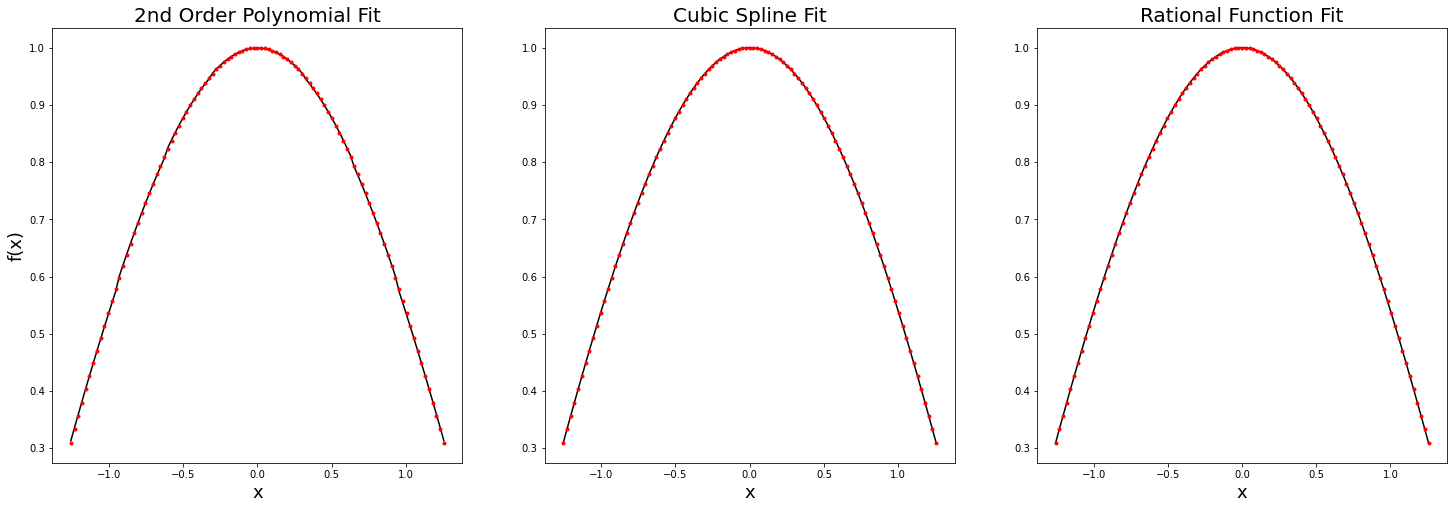

The mean error for the 2nd order polynomial fit is:  0.0013958173092645848
The mean error for the 3rd order polynomial fit is:  0.00011088114090711158
The mean error for the cubic spline fit is:  1.3486240222884336e-05
The mean error for the rational function fit is:  9.34255299377088e-08


(array([ 1.00000001e+00,  1.16415322e-10, -4.05315141e-01, -1.16415322e-10]),
 array([2.32830644e-10, 9.46857264e-02, 1.45519152e-11, 5.66888328e-03,
        0.00000000e+00, 2.97392565e-04]))

In [89]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(25,8))

fit_compare(x_cosine, y_cosine, yy_true_cosine, bounds_cosine, xx_cosine, f_cosine, fig, [ax1,ax2,ax3], 4, 7, False)

In [90]:
#Define Lorentzian function
f_lorentz = lambda x: 1/(1+x**2)
#Set x boundaries
bounds_lorentz = [-1,1]
x_lorentz = np.linspace(bounds_lorentz[0], bounds_lorentz[1], 11)
y_lorentz = f_lorentz(x_lorentz)

xx_lorentz = np.linspace(x_lorentz[1], x_lorentz[-2]-1e-13, 101)
yy_true_lorentz = f_lorentz(xx_lorentz)

For the function f(x) = 1/(1+x^2)


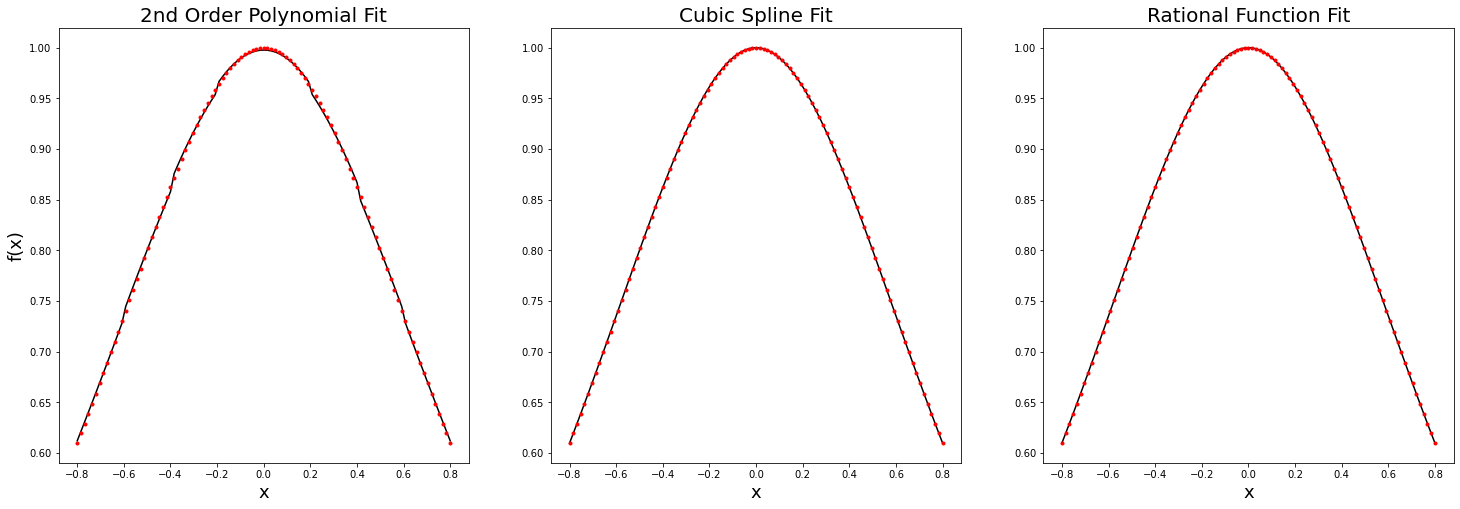

The mean error for the 2nd order polynomial fit is:  0.0013958173092645848
The mean error for the 3rd order polynomial fit is:  0.00011088114090711158
The mean error for the cubic spline fit is:  4.123189377453754e-05
The mean error for the rational function fit is:  2.1874691277267936e-16


In [91]:
#Plot lorentzian fits and output mean errors
print('For the function f(x) = 1/(1+x^2)')
fig_1, [ax11,ax22,ax33] = plt.subplots(1,3,figsize=(25,8))
p_cos_inv, q_cos_inv = fit_compare(x_lorentz, y_lorentz, yy_true_lorentz, bounds_lorentz, xx_lorentz, f_lorentz, fig_1, [ax11,ax22,ax33], 1, 5, False)

The error on the Lorentzian function using the rational fit should be improved compared to the value for the cosine function rational fit. This is observed in the plots above. My result does not agree when the order is higher; for n and m equal to 4 and 5 respectively, the fit does not converge. The right-most figure below demonstrates n,m = 4,5.

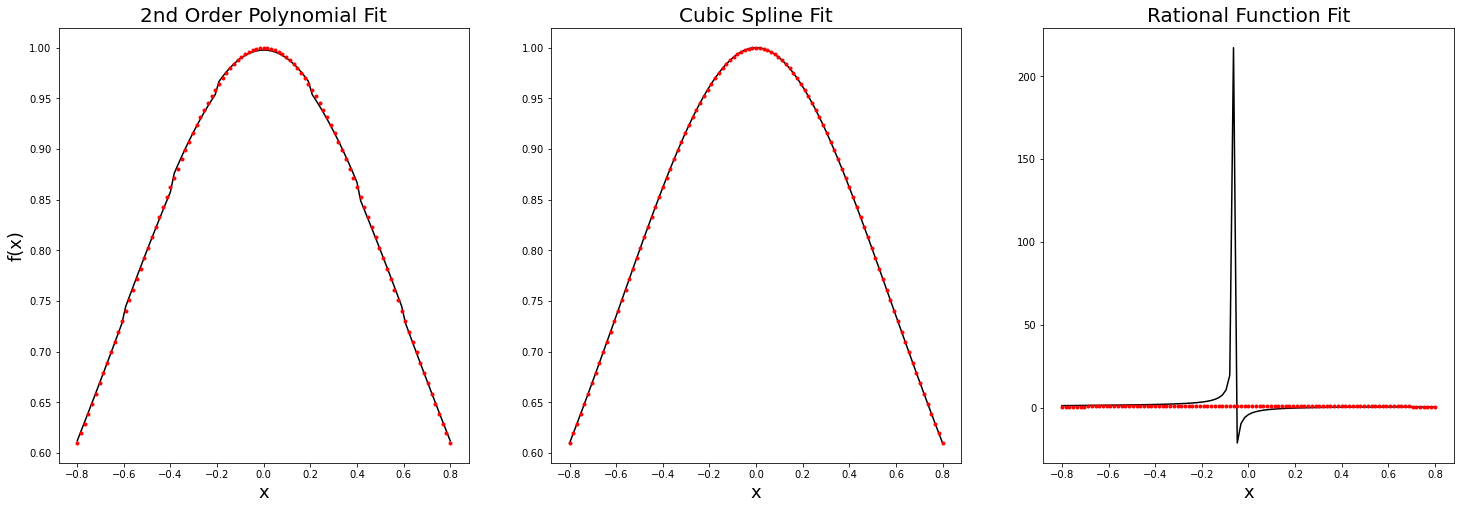

The mean error for the 2nd order polynomial fit is:  0.0013958173092645848
The mean error for the 3rd order polynomial fit is:  0.00011088114090711158
The mean error for the cubic spline fit is:  4.123189377453754e-05
The mean error for the rational function fit is:  3.943511574449091


In [92]:
fig_2, [ax111,ax222,ax333] = plt.subplots(1,3,figsize=(25,8))
p_lorentz_inv, q_lorentz_inv = fit_compare(x_lorentz, y_lorentz, yy_true_lorentz, bounds_lorentz, xx_lorentz, f_lorentz, fig_2, [ax111,ax222,ax333], 4, 5, False)

Added an option to use np.linalg.inv or np.linalg.pinv for the rational fit. Trying this out for both functions:

Cosine


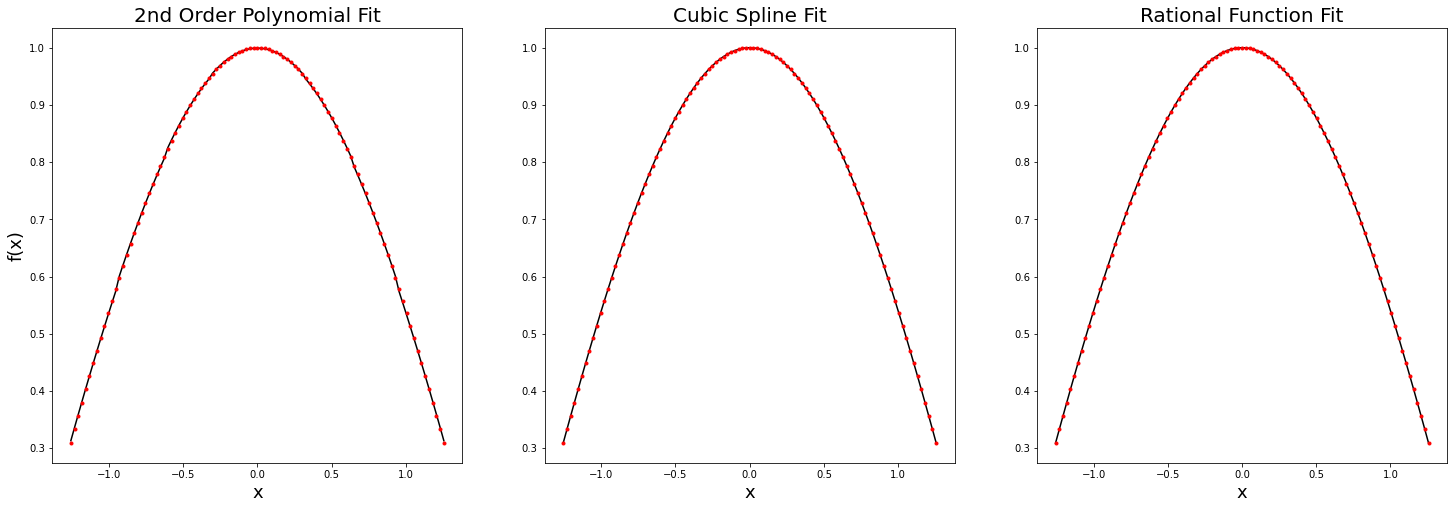

The mean error for the 2nd order polynomial fit is:  0.0013958173092645848
The mean error for the 3rd order polynomial fit is:  0.00011088114090711158
The mean error for the cubic spline fit is:  1.3486240222884336e-05
The mean error for the rational function fit is:  4.032713142416755e-06


Lorentzian


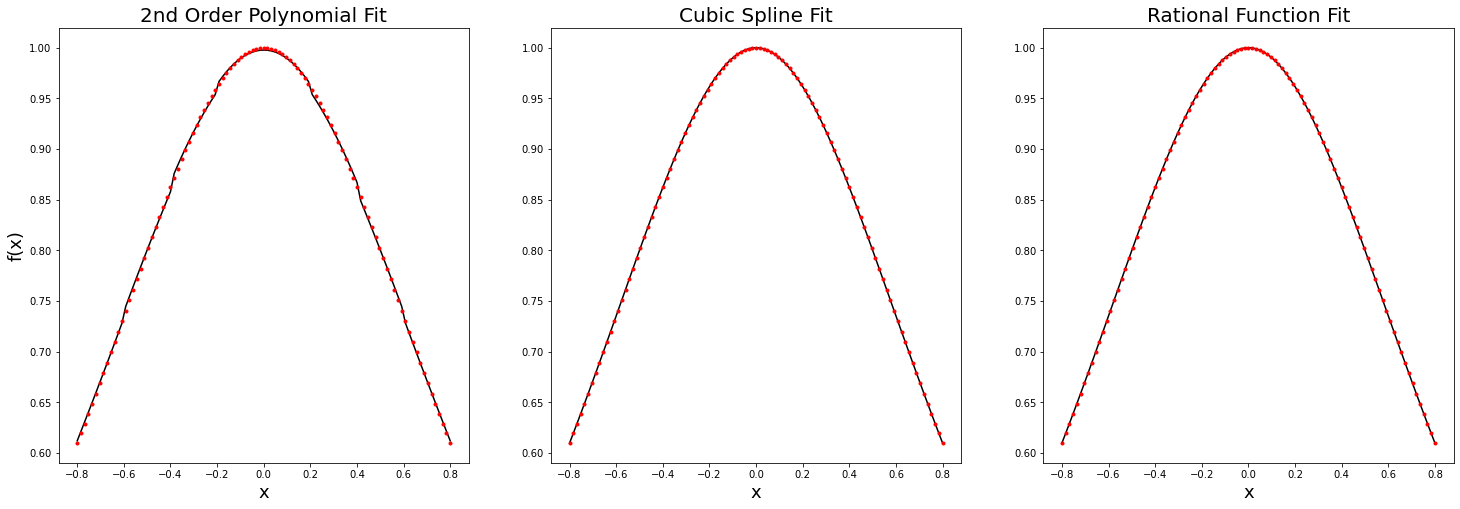

The mean error for the 2nd order polynomial fit is:  0.0013958173092645848
The mean error for the 3rd order polynomial fit is:  0.00011088114090711158
The mean error for the cubic spline fit is:  4.123189377453754e-05
The mean error for the rational function fit is:  5.408215129857198e-16


In [93]:
#Trying the p inverse
print('Cosine')
fig_3, [ax1111,ax2222,ax3333] = plt.subplots(1,3,figsize=(25,8))
p_cos_pinv, q_cos_pinv = fit_compare(x_cosine, y_cosine, yy_true_cosine, bounds_cosine, xx_cosine, f_cosine, fig_2, [ax1111,ax2222,ax3333], 4, 5, True)
print('\n')
print('Lorentzian')
fig_4, [ax11111,ax22222,ax33333] = plt.subplots(1,3,figsize=(25,8))
p_lorentz_pinv, q_lorentz_pinv = fit_compare(x_lorentz, y_lorentz, yy_true_lorentz, bounds_lorentz, xx_lorentz, f_lorentz, fig_2, [ax11111,ax22222,ax33333], 4, 5, True)

It seems that the p inverse fixed the rational fit for the Lorentzian when n and m equal 4 and 5. The values p and q are the coefficients of the matrix of y. Let's take a look at p and q to see how they vary when using inv and pinv.

In [94]:
print('p when using np.linalg.inv for cos: ', p_cos_inv)
print('q when using np.linalg.inv for cos: ', q_cos_inv)

print('p when using np.linalg.inv for lorentzian: ', p_lorentz_inv)
print('q when using np.linalg.inv for lorentzian', q_lorentz_inv)

print('p when using np.linalg.pinv for cos: ', p_cos_pinv)
print('q when using np.linalg.pinv for cos: ', q_cos_pinv)

print('p when using np.linalg.pinv for lorentzian: ', p_lorentz_pinv)
print('q when using np.linalg.pinv for lorentzian: ', q_lorentz_pinv)

p when using np.linalg.inv for cos:  [1.]
q when using np.linalg.inv for cos:  [ 2.77555756e-17  1.00000000e+00 -4.44089210e-16  0.00000000e+00]
p when using np.linalg.inv for lorentzian:  [-4.19334302 16.          0.         -5.38636997]
q when using np.linalg.inv for lorentzian [16.  0.  0.  0.]
p when using np.linalg.pinv for cos:  [ 9.99998600e-01 -1.81898940e-12 -4.05615855e-01  4.54747351e-13]
q when using np.linalg.pinv for cos:  [0.         0.09433319 0.         0.00574368]
p when using np.linalg.pinv for lorentzian:  [ 1.00000000e+00 -7.99360578e-15 -3.33333333e-01  1.42108547e-14]
q when using np.linalg.pinv for lorentzian:  [-7.10542736e-15  6.66666667e-01  1.59872116e-14 -3.33333333e-01]


When expanding a cosine function, only the even order terms survive, and none of them have any x terms in their denominator. This means that the coefficients q should all be 0, and only the second and fourth coefficients in p should be found. This is observed when using pinv, and not with inv.
A similar approach can be taken for the lorentzian function, where only the first coefficient in p is supposed to be there, and a coefficient for the second order term in the denominator (q). Again, this is only seen when using pinv, so something goes wrong when trying to take the inv of a singular matrix.